In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#get stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-04-22')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575915
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643498
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783866
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917508
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897017
...,...,...,...,...,...,...
2022-04-18,166.600006,163.570007,163.919998,165.070007,69023900.0,165.070007
2022-04-19,167.820007,163.910004,165.020004,167.399994,67723800.0,167.399994
2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996


In [3]:
df.shape

(2594, 6)

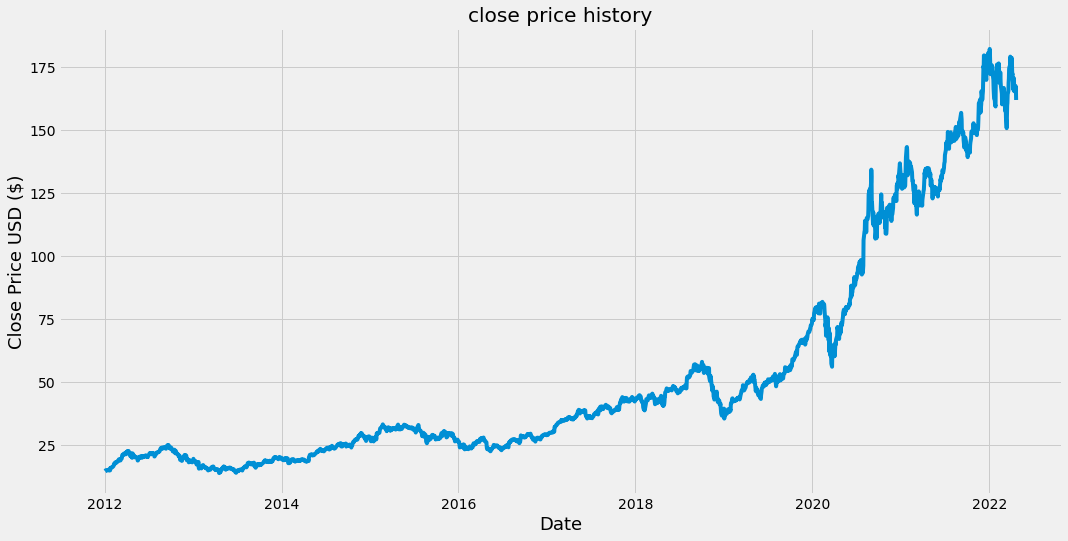

In [4]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#create new df with only close col
data = df.filter(['Close'])
#convert to numpy arr
dataset = data.values
#get number of rows to train model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2076

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.91205653],
       [0.90723691],
       [0.8796876 ]])

In [8]:
#create training data set
# create scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [9]:
# convert x_train and y_train to numpy arrs
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2016, 60, 1)

In [12]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2016/2016 [==============================] - 27s 13ms/step - loss: 2.8296e-04


In [15]:
# create the testing data set
# create a new array containing scaled vals from index 2016 to 2076
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [16]:
# convert data to numpy arr
x_test = np.array(x_test)

In [17]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
# get the model's pred price vals
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
# get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

15.314880349000909

C:\Users\pjjon\AppData\Local\Temp\ipykernel_17160\3172122601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


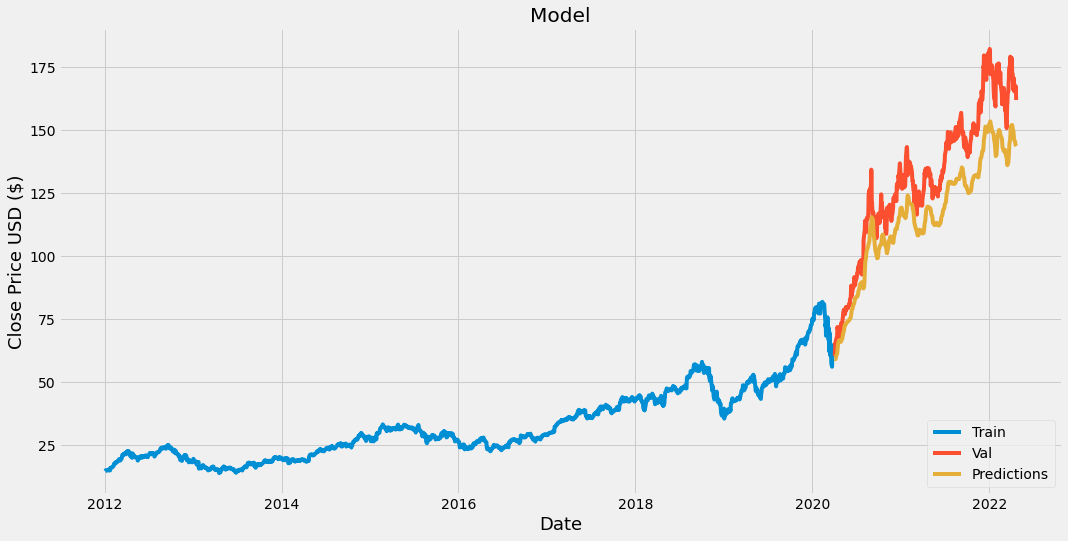

In [21]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [22]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-04-03,60.352501,59.225361
2020-04-06,65.617500,59.075848
2020-04-07,64.857498,59.370029
2020-04-08,66.517502,59.807014
2020-04-09,66.997498,60.453876
...,...,...
2022-04-18,165.070007,145.145859
2022-04-19,167.399994,144.300110
2022-04-20,167.229996,143.845215


In [23]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-04-22')
# create new dataframe
new_df = apple_quote.filter(['Close'])
# get the last 60 day closing price vals and convert to arr
last_60_days = new_df[-60:].values
#scale the data to be vals bw 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create empty list
X_test = []
# append last 60 days 
X_test.append(last_60_days_scaled)
# convert to numpy arr
X_test = np.array(X_test)
# reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# get predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[142.93211]]


In [24]:
# get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-04-22', end='2022-04-22')
print(apple_quote2['Close'])

Date
2022-04-22    161.789993
Name: Close, dtype: float64
